# <center><font color = "green">PUBG Game Prediction</center>

<center><img src = https://media2.giphy.com/media/Li0OOdFFgAfECfuE9H/200w.webp?cid=ecf05e47vwcmpyrrjxd09kue7v4mczko047y63f8l252t22z&ep=v1_gifs_search&rid=200w.webp&ct=g></center>

# Table Content
1. [Importing Libraries](#import)
2. [Reading Data](#read)

# <font color="green">Importing Libraries</font><a class="anchor" id="import">

In [35]:
!pip install catboost
# conda install -c conda-forge catboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# handling warnings
import warnings
warnings.filterwarnings("ignore")

# standard libraries
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# <font color="green">Reading Data</font><a class="anchor" id="read">

In [3]:
# load the data
df = pd.read_csv("PUBG_Game_Prediction_data.csv")

In [4]:
# glimpse of the data
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
df.shape

(4446966, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

# Data Wrangling

In [7]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [8]:
# remove the data row
df.drop(2744604, inplace = True)
# df=df.drop(2744604)

In [9]:
df.shape

(4446965, 29)

In [10]:
# prepare new parameter to know how many players are in a game
df['playersJoined']=df.groupby('matchId')['matchId'].transform('count')

In [11]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


In [12]:
df[df['playersJoined']>=75]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.000,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.000,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.000,0,0,49.75,2,0,0.1875,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,94
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.0000,0,0.000,0,0,81.70,6,0,0.2935,93
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0.0000,0,2.184,0,0,788.70,4,0,0.4815,98
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.0000,0,0.000,0,0,2748.00,8,0,0.8000,94


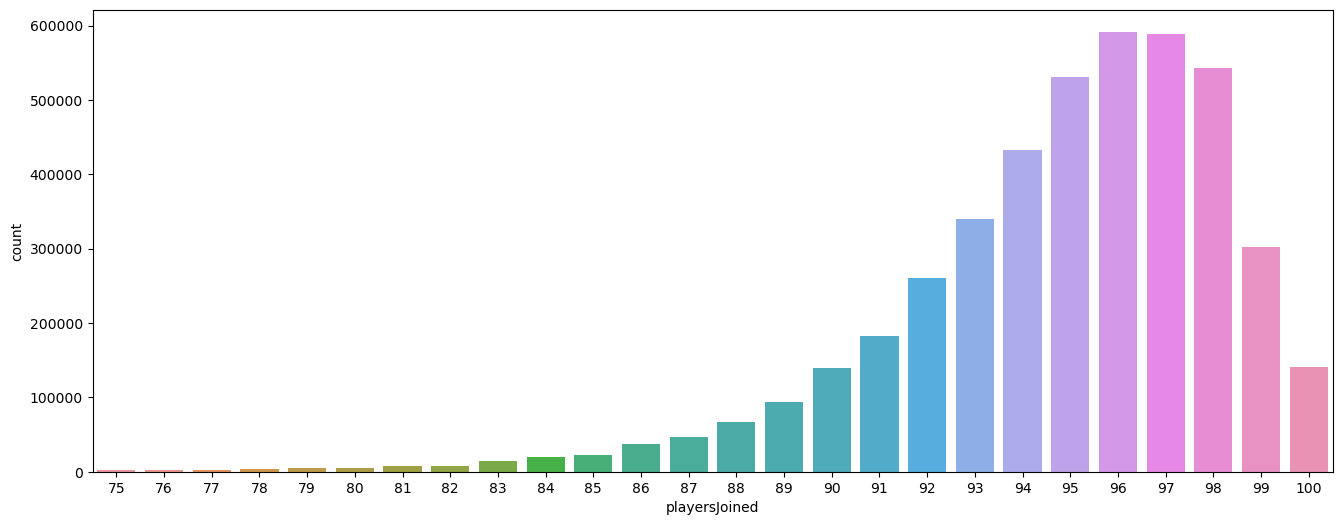

In [13]:
t=df[df['playersJoined']>=75]
sns.countplot(data = t, x = t['playersJoined'])
plt.show()

# Analysing the data

Kills Without Moving?

In [14]:
df['totalDistance']=df['rideDistance'] + df['walkDistance'] + df['swimDistance']

In [15]:
df['killswithoutMoving'] = ((df['kills']>0) & (df['totalDistance'] ==0))

In [16]:
df[df['killswithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [17]:
df[df['killswithoutMoving'] == True].shape

(1535, 32)

In [18]:
df.drop(df[df['killswithoutMoving'] == True].index,inplace = True)

In [19]:
df[df['killswithoutMoving'] == True].shape

(0, 32)

Extra-ordinary Road Kills?????

In [20]:
df[df['roadKills'] > 5].shape

(46, 32)

In [21]:
df.drop(df[df['roadKills'] > 5].index, inplace = True)

In [22]:
df[df['roadKills'] > 5].shape

(0, 32)

So many KILLS - how ????

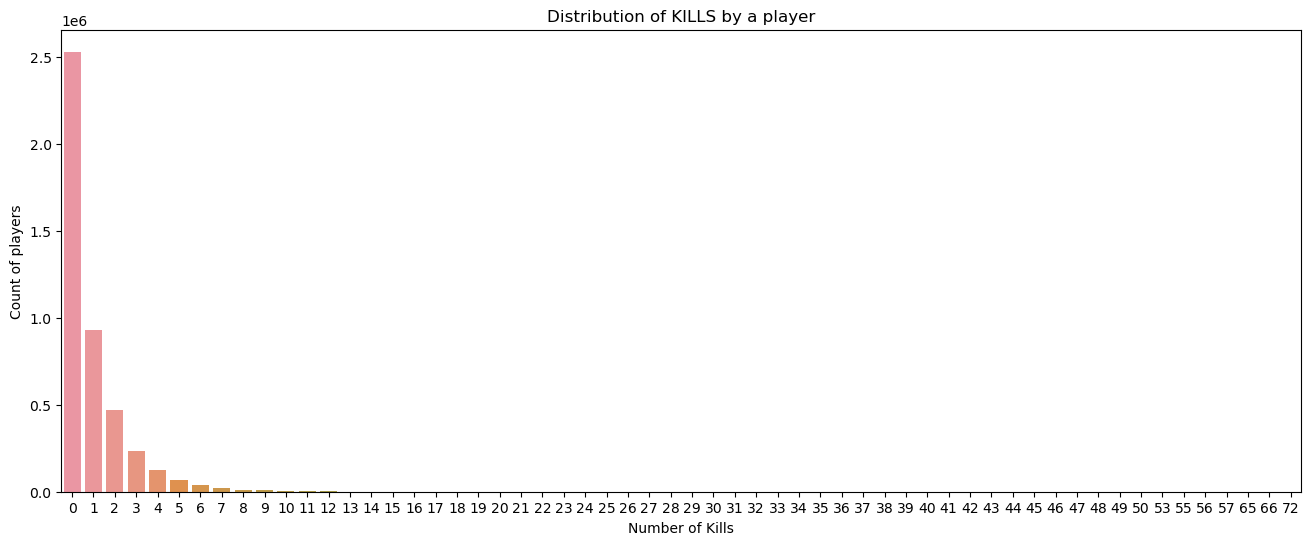

In [23]:
sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

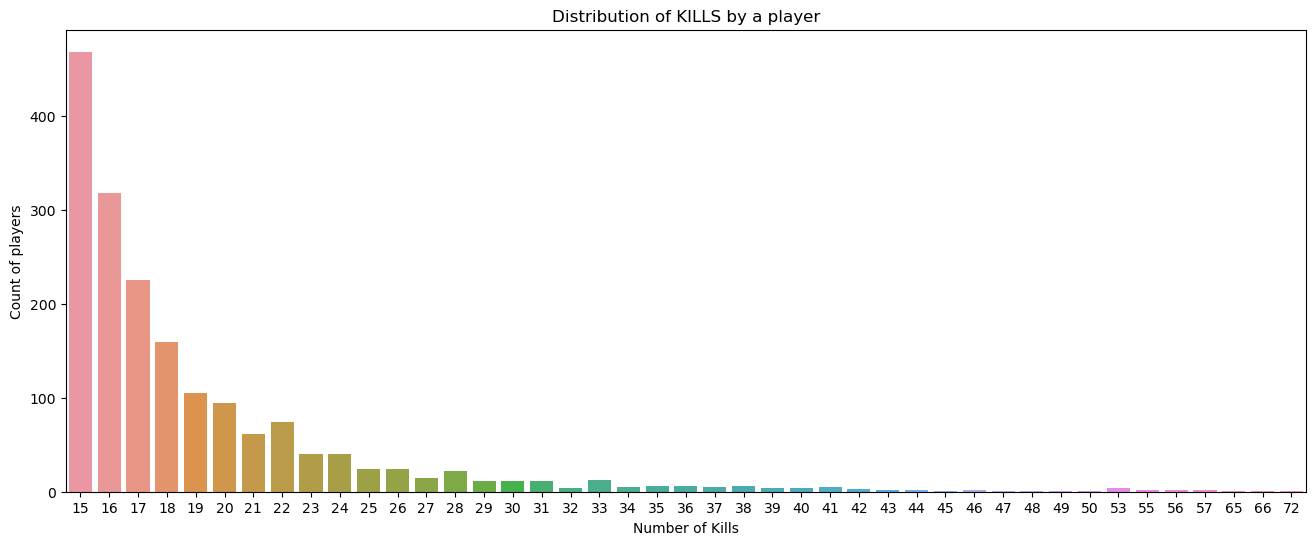

In [24]:
d=df[df['kills']>=15]
sns.countplot(data = d, x = d['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [25]:
# data dimension
df[df['kills'] > 20].shape

(417, 32)

In [26]:
# drop the instances
df.drop(df[df['kills'] > 20].index, inplace = True)

In [27]:
df[df['kills'] > 20].shape

(0, 32)

HeadShot

In [28]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

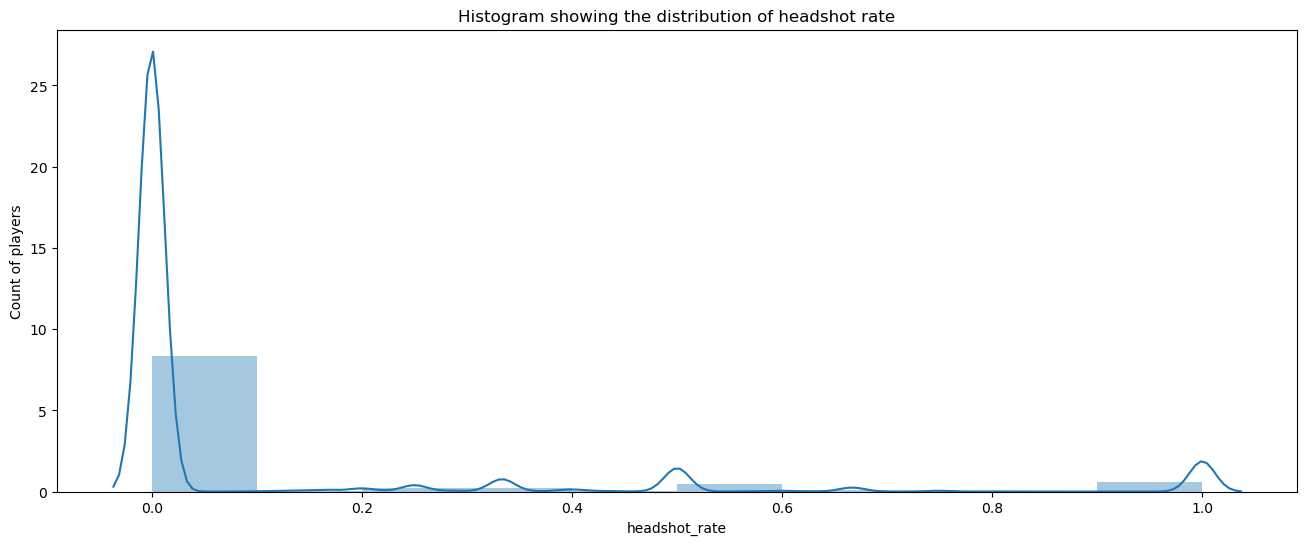

In [29]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [30]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(187, 33)

In [31]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

Longest Shot

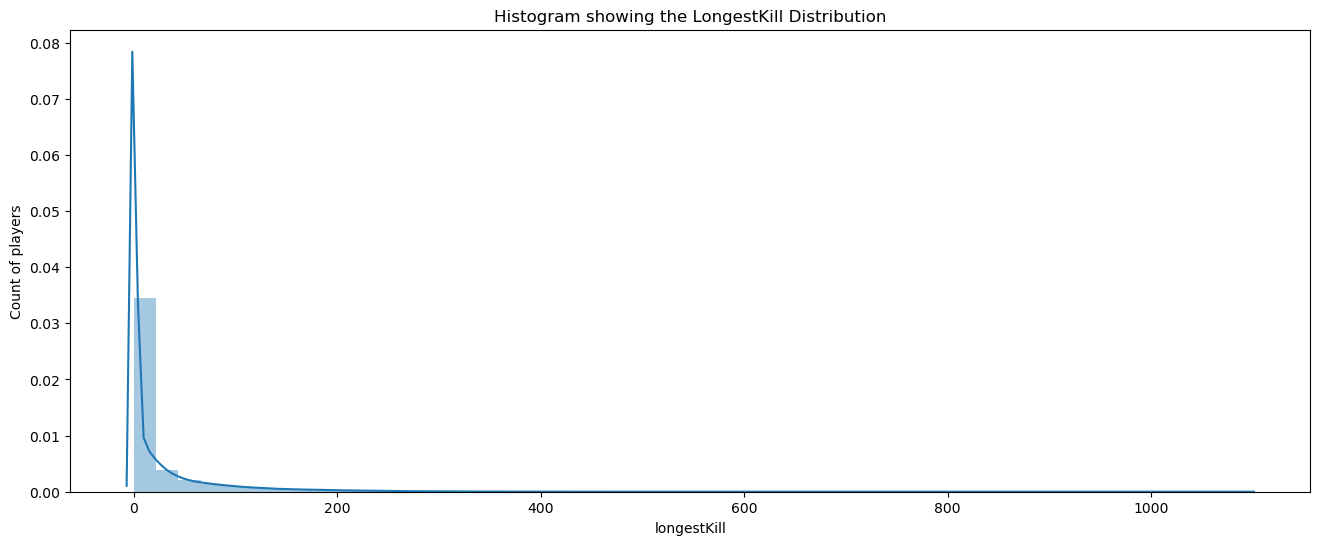

In [32]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [33]:
df[df['longestKill']>=500].shape

(1747, 33)

In [34]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

Weapon Change

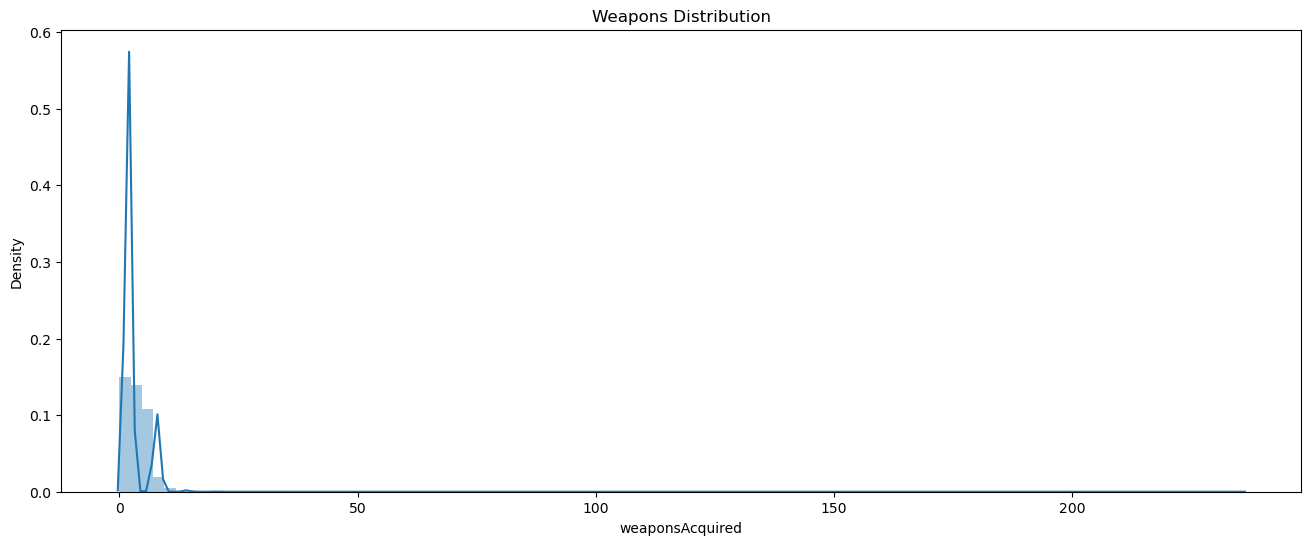

In [35]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [36]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [37]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

In [38]:
df[df['weaponsAcquired']>=15].shape

(0, 33)

Data Exploration

In [39]:
df.shape

(4436306, 33)

In [40]:
df.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
dtype: int64

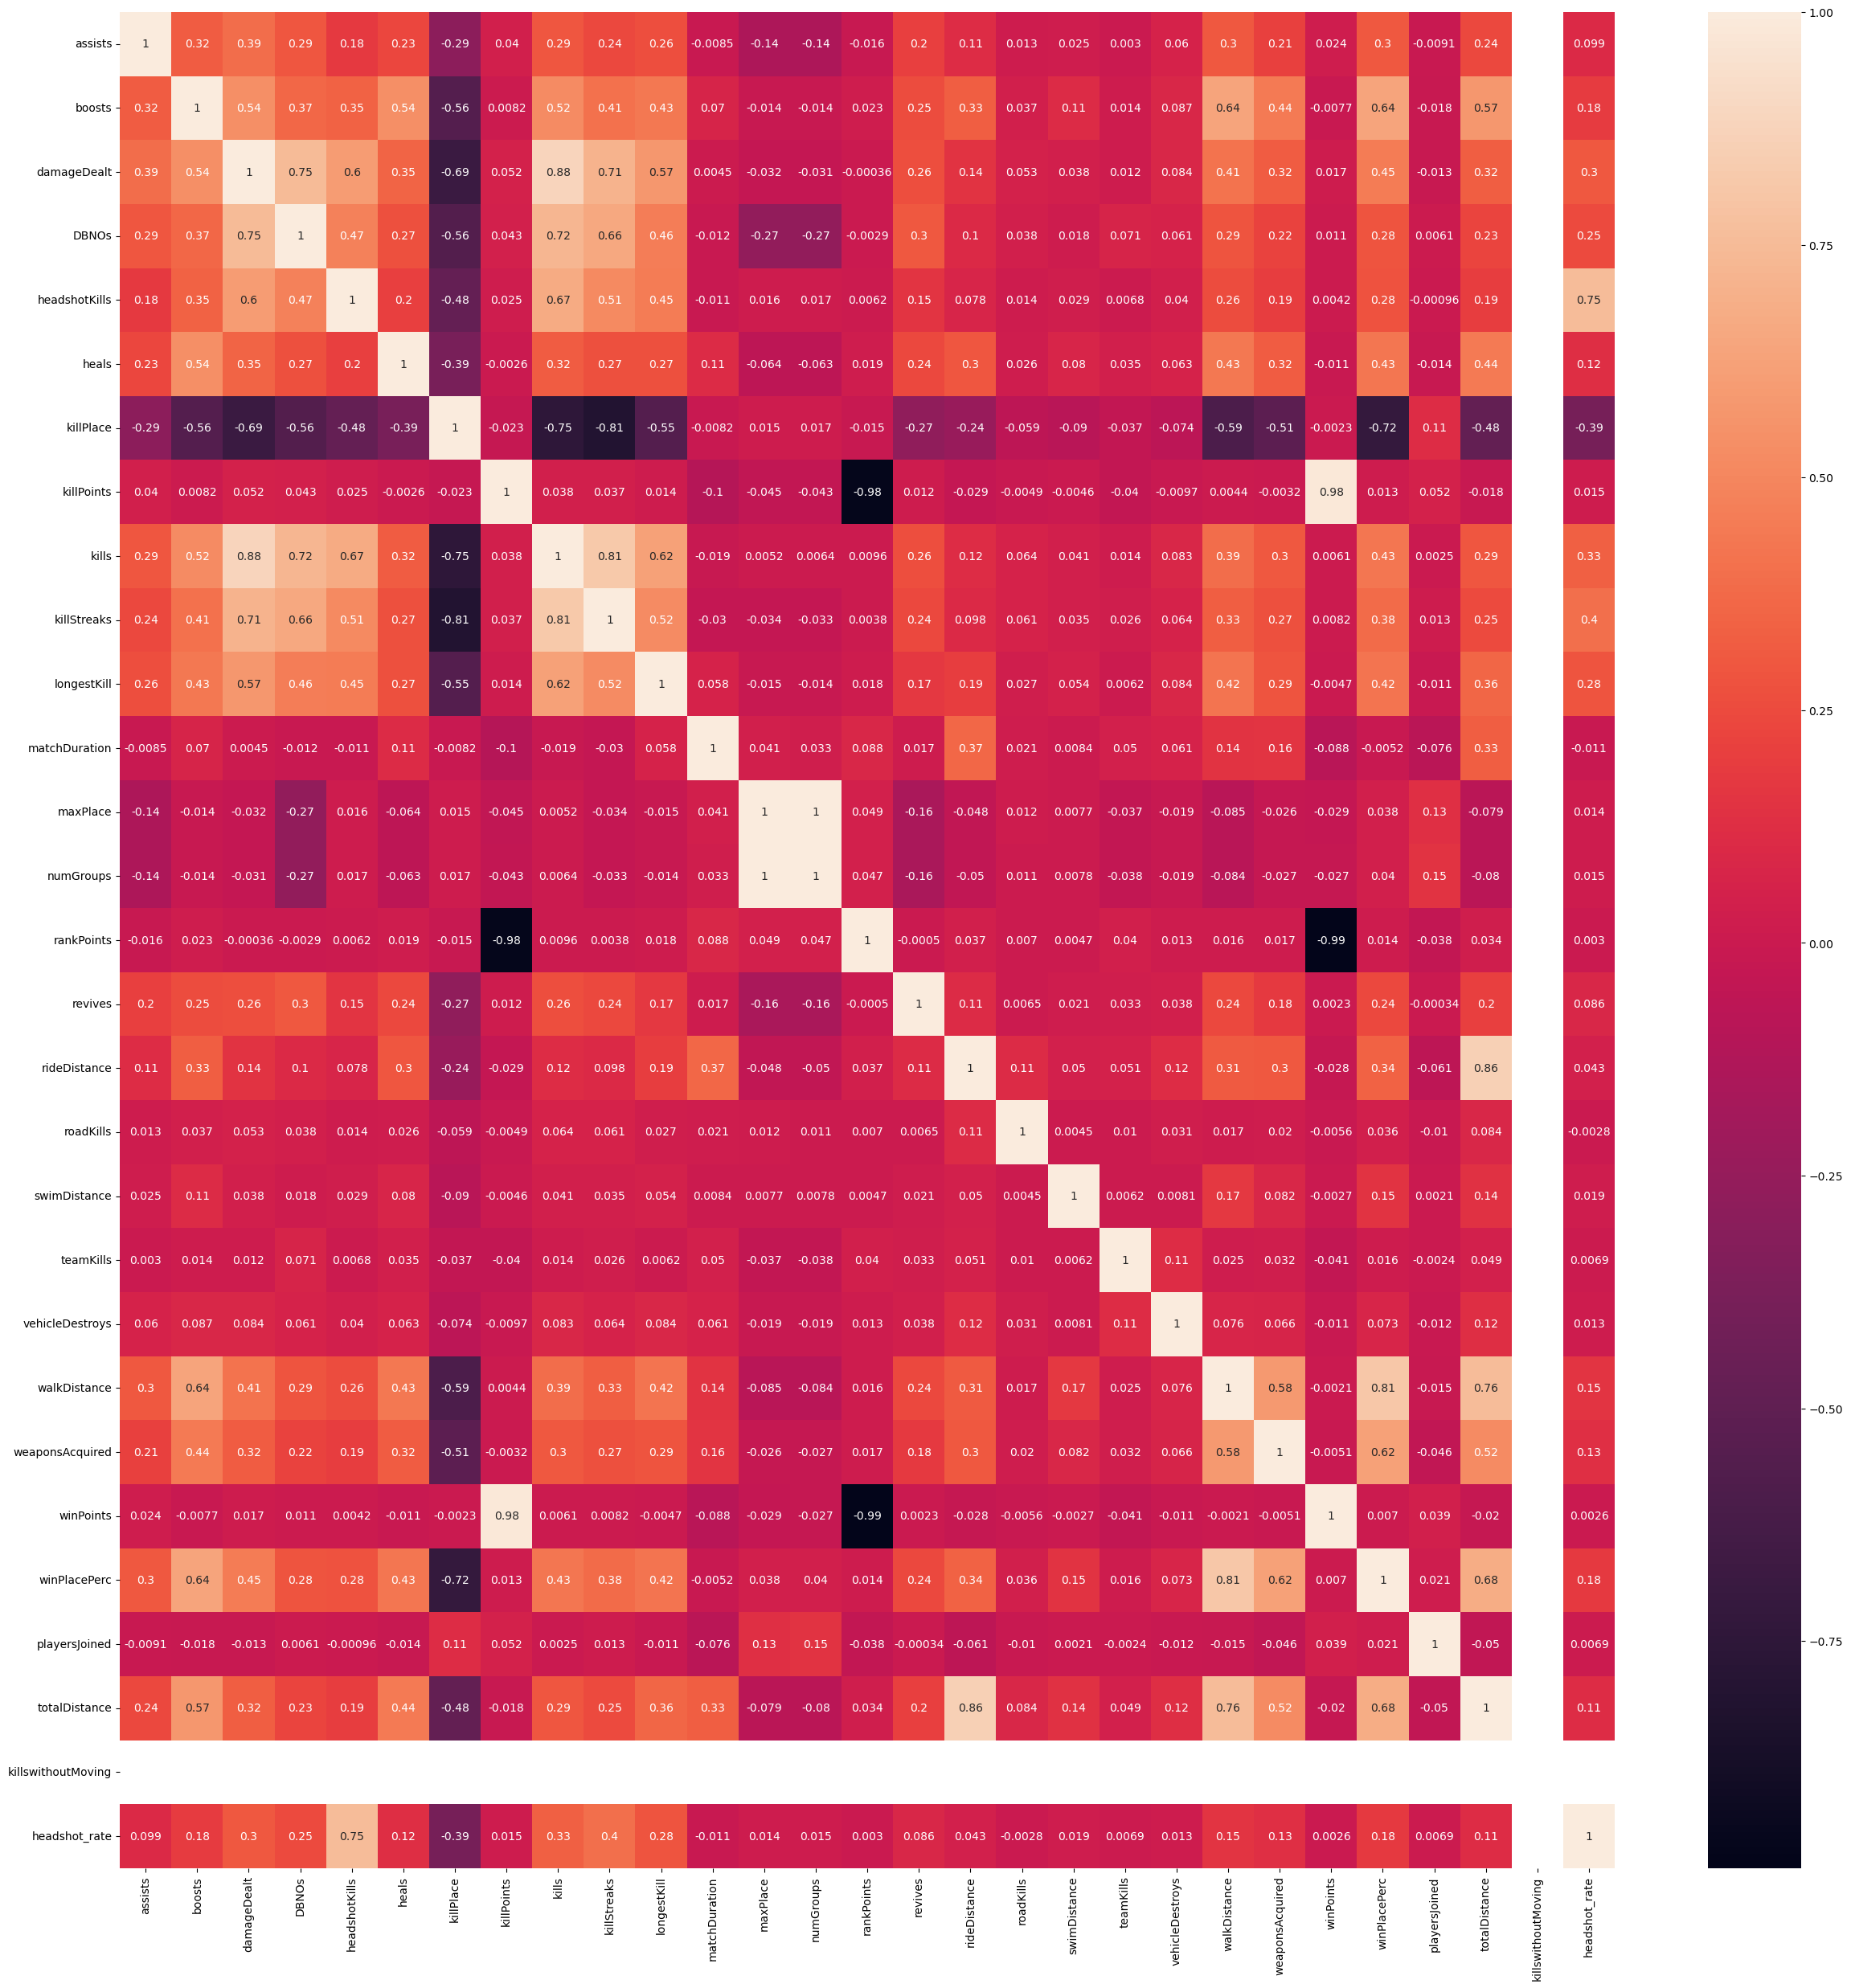

In [41]:
# correlation of parameter with Win Prediction
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(), annot = True)
plt.show()

Feature Engineering

In [42]:
normalising_factor = ((100 - df['playersJoined'])/100)+1

In [43]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [44]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [45]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [46]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,29.12,1358.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,99.7023,28.34,1936.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,69.3600,51.00,1344.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,35.8610,33.79,1565.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,1.03,103.0000,99.91,1466.72,49.7500,0,0


ML - Catboost Model

Handling categorical data

In [47]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [48]:
x = pd.get_dummies(x, columns = ['matchType', 'killswithoutMoving'])

In [49]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [50]:
x.shape

(4436306, 40)

In [51]:
features = x.columns

# Scaling the data

In [52]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [53]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582937,-0.384018,0.449345,1.172485,-0.765100,-0.459622,-0.732886,-1.212390,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
1,-0.582937,-0.384018,0.340055,-0.804728,-0.765100,-0.459622,-0.775859,0.803564,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
2,-0.582937,-0.384018,-0.024245,-0.804728,-0.765100,-0.459622,0.169557,0.813067,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,-0.808936,0.0
3,-0.582937,-0.384018,0.995795,-0.804728,-0.765100,-0.459622,-0.560992,0.700391,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
4,-0.582937,-0.384018,-0.097105,-0.804728,0.647633,0.727371,2.232284,0.906738,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,2.696896,-0.405071,-0.808936,0.0


# Splitting data

In [55]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [56]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3105414, 40) (3105414,)
(1330892, 40) (1330892,)


# CatBoost Model

In [57]:
import catboost as cb

In [58]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [59]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [61]:
# GRID Search

grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5482016	test: 0.5479886	best: 0.5479886 (0)	total: 244ms	remaining: 24.1s
1:	learn: 0.5333650	test: 0.5331566	best: 0.5331566 (1)	total: 465ms	remaining: 22.8s
2:	learn: 0.5189826	test: 0.5187815	best: 0.5187815 (2)	total: 679ms	remaining: 22s
3:	learn: 0.5050844	test: 0.5048926	best: 0.5048926 (3)	total: 893ms	remaining: 21.4s
4:	learn: 0.4916276	test: 0.4914432	best: 0.4914432 (4)	total: 1.12s	remaining: 21.3s
5:	learn: 0.4786251	test: 0.4784449	best: 0.4784449 (5)	total: 1.35s	remaining: 21.1s
6:	learn: 0.4660267	test: 0.4658539	best: 0.4658539 (6)	total: 1.57s	remaining: 20.8s
7:	learn: 0.4538495	test: 0.4536820	best: 0.4536820 (7)	total: 1.78s	remaining: 20.4s
8:	learn: 0.4420341	test: 0.4418693	best: 0.4418693 (8)	total: 1.98s	remaining: 20s
9:	learn: 0.4306331	test: 0.4304748	best: 0.4304748 (9)	total: 2.16s	remaining: 19.4s
10:	learn: 0.4195967	test: 0.4194453	best: 0.4194453 (10)	total: 2.34s	remaining: 19s
11:	learn: 0.4089243	test: 0.4087765	best: 0.4087765 (11)	

95:	learn: 0.1393884	test: 0.1394777	best: 0.1394777 (95)	total: 18.9s	remaining: 785ms
96:	learn: 0.1390129	test: 0.1391028	best: 0.1391028 (96)	total: 19s	remaining: 589ms
97:	learn: 0.1386531	test: 0.1387444	best: 0.1387444 (97)	total: 19.2s	remaining: 392ms
98:	learn: 0.1382922	test: 0.1383837	best: 0.1383837 (98)	total: 19.4s	remaining: 196ms
99:	learn: 0.1379109	test: 0.1380030	best: 0.1380030 (99)	total: 19.6s	remaining: 0us

bestTest = 0.1380030404
bestIteration = 99

0:	loss: 0.1380030	best: 0.1380030 (0)	total: 22.9s	remaining: 5m 44s
0:	learn: 0.5126068	test: 0.5124096	best: 0.5124096 (0)	total: 227ms	remaining: 22.5s
1:	learn: 0.4671679	test: 0.4669991	best: 0.4669991 (1)	total: 413ms	remaining: 20.2s
2:	learn: 0.4264429	test: 0.4262951	best: 0.4262951 (2)	total: 623ms	remaining: 20.1s
3:	learn: 0.3902182	test: 0.3900853	best: 0.3900853 (3)	total: 844ms	remaining: 20.2s
4:	learn: 0.3581625	test: 0.3580502	best: 0.3580502 (4)	total: 1.05s	remaining: 19.9s
5:	learn: 0.3295063

88:	learn: 0.1175682	test: 0.1177880	best: 0.1177880 (88)	total: 17.5s	remaining: 2.16s
89:	learn: 0.1174700	test: 0.1176866	best: 0.1176866 (89)	total: 17.7s	remaining: 1.96s
90:	learn: 0.1170130	test: 0.1172333	best: 0.1172333 (90)	total: 17.9s	remaining: 1.77s
91:	learn: 0.1169114	test: 0.1171318	best: 0.1171318 (91)	total: 18.1s	remaining: 1.57s
92:	learn: 0.1165935	test: 0.1168209	best: 0.1168209 (92)	total: 18.3s	remaining: 1.38s
93:	learn: 0.1165014	test: 0.1167280	best: 0.1167280 (93)	total: 18.5s	remaining: 1.18s
94:	learn: 0.1163893	test: 0.1166139	best: 0.1166139 (94)	total: 18.7s	remaining: 985ms
95:	learn: 0.1162967	test: 0.1165239	best: 0.1165239 (95)	total: 18.9s	remaining: 788ms
96:	learn: 0.1162030	test: 0.1164302	best: 0.1164302 (96)	total: 19.1s	remaining: 590ms
97:	learn: 0.1158406	test: 0.1160634	best: 0.1160634 (97)	total: 19.3s	remaining: 394ms
98:	learn: 0.1156516	test: 0.1158705	best: 0.1158705 (98)	total: 19.5s	remaining: 197ms
99:	learn: 0.1155673	test: 0.115

81:	learn: 0.1465942	test: 0.1466702	best: 0.1466702 (81)	total: 16.8s	remaining: 13.9s
82:	learn: 0.1459069	test: 0.1459836	best: 0.1459836 (82)	total: 17s	remaining: 13.7s
83:	learn: 0.1452525	test: 0.1453301	best: 0.1453301 (83)	total: 17.2s	remaining: 13.5s
84:	learn: 0.1446706	test: 0.1447487	best: 0.1447487 (84)	total: 17.3s	remaining: 13.3s
85:	learn: 0.1441052	test: 0.1441875	best: 0.1441875 (85)	total: 17.5s	remaining: 13s
86:	learn: 0.1435789	test: 0.1436599	best: 0.1436599 (86)	total: 17.7s	remaining: 12.8s
87:	learn: 0.1430675	test: 0.1431493	best: 0.1431493 (87)	total: 17.9s	remaining: 12.6s
88:	learn: 0.1425181	test: 0.1426011	best: 0.1426011 (88)	total: 18.1s	remaining: 12.4s
89:	learn: 0.1420325	test: 0.1421157	best: 0.1421157 (89)	total: 18.3s	remaining: 12.2s
90:	learn: 0.1415807	test: 0.1416651	best: 0.1416651 (90)	total: 18.5s	remaining: 12s
91:	learn: 0.1410801	test: 0.1411653	best: 0.1411653 (91)	total: 18.7s	remaining: 11.8s
92:	learn: 0.1406361	test: 0.1407211	b

24:	learn: 0.1444679	test: 0.1445741	best: 0.1445741 (24)	total: 5.13s	remaining: 25.6s
25:	learn: 0.1427532	test: 0.1428619	best: 0.1428619 (25)	total: 5.32s	remaining: 25.4s
26:	learn: 0.1410325	test: 0.1411490	best: 0.1411490 (26)	total: 5.53s	remaining: 25.2s
27:	learn: 0.1397121	test: 0.1398342	best: 0.1398342 (27)	total: 5.73s	remaining: 25s
28:	learn: 0.1385138	test: 0.1386441	best: 0.1386441 (28)	total: 5.93s	remaining: 24.7s
29:	learn: 0.1373681	test: 0.1374997	best: 0.1374997 (29)	total: 6.13s	remaining: 24.5s
30:	learn: 0.1361994	test: 0.1363356	best: 0.1363356 (30)	total: 6.32s	remaining: 24.3s
31:	learn: 0.1353136	test: 0.1354444	best: 0.1354444 (31)	total: 6.51s	remaining: 24s
32:	learn: 0.1345248	test: 0.1346624	best: 0.1346624 (32)	total: 6.68s	remaining: 23.7s
33:	learn: 0.1336593	test: 0.1337995	best: 0.1337995 (33)	total: 6.88s	remaining: 23.5s
34:	learn: 0.1329321	test: 0.1330816	best: 0.1330816 (34)	total: 7.06s	remaining: 23.2s
35:	learn: 0.1323161	test: 0.1324657

118:	learn: 0.1135147	test: 0.1137264	best: 0.1137264 (118)	total: 24.3s	remaining: 6.32s
119:	learn: 0.1133877	test: 0.1135984	best: 0.1135984 (119)	total: 24.5s	remaining: 6.11s
120:	learn: 0.1130869	test: 0.1133020	best: 0.1133020 (120)	total: 24.7s	remaining: 5.91s
121:	learn: 0.1130217	test: 0.1132329	best: 0.1132329 (121)	total: 24.9s	remaining: 5.7s
122:	learn: 0.1129736	test: 0.1131855	best: 0.1131855 (122)	total: 25.1s	remaining: 5.5s
123:	learn: 0.1127117	test: 0.1129295	best: 0.1129295 (123)	total: 25.3s	remaining: 5.3s
124:	learn: 0.1124235	test: 0.1126401	best: 0.1126401 (124)	total: 25.5s	remaining: 5.1s
125:	learn: 0.1123005	test: 0.1125179	best: 0.1125179 (125)	total: 25.7s	remaining: 4.89s
126:	learn: 0.1120148	test: 0.1122254	best: 0.1122254 (126)	total: 25.9s	remaining: 4.68s
127:	learn: 0.1117820	test: 0.1119912	best: 0.1119912 (127)	total: 26.1s	remaining: 4.48s
128:	learn: 0.1115320	test: 0.1117426	best: 0.1117426 (128)	total: 26.3s	remaining: 4.27s
129:	learn: 0.

60:	learn: 0.1529779	test: 0.1530852	best: 0.1530852 (60)	total: 16.3s	remaining: 10.4s
61:	learn: 0.1513056	test: 0.1514155	best: 0.1514155 (61)	total: 16.6s	remaining: 10.2s
62:	learn: 0.1496776	test: 0.1497905	best: 0.1497905 (62)	total: 16.8s	remaining: 9.89s
63:	learn: 0.1480832	test: 0.1482001	best: 0.1482001 (63)	total: 17.1s	remaining: 9.62s
64:	learn: 0.1466036	test: 0.1467262	best: 0.1467262 (64)	total: 17.4s	remaining: 9.35s
65:	learn: 0.1451844	test: 0.1453096	best: 0.1453096 (65)	total: 17.6s	remaining: 9.09s
66:	learn: 0.1438087	test: 0.1439399	best: 0.1439399 (66)	total: 17.9s	remaining: 8.83s
67:	learn: 0.1425103	test: 0.1426440	best: 0.1426440 (67)	total: 18.2s	remaining: 8.57s
68:	learn: 0.1412739	test: 0.1414109	best: 0.1414109 (68)	total: 18.5s	remaining: 8.3s
69:	learn: 0.1401066	test: 0.1402457	best: 0.1402457 (69)	total: 18.8s	remaining: 8.05s
70:	learn: 0.1389769	test: 0.1391182	best: 0.1391182 (70)	total: 19.1s	remaining: 7.79s
71:	learn: 0.1377867	test: 0.1379

53:	learn: 0.1053970	test: 0.1056351	best: 0.1056351 (53)	total: 14.3s	remaining: 12.2s
54:	learn: 0.1052029	test: 0.1054398	best: 0.1054398 (54)	total: 14.6s	remaining: 11.9s
55:	learn: 0.1049609	test: 0.1051901	best: 0.1051901 (55)	total: 14.8s	remaining: 11.6s
56:	learn: 0.1048083	test: 0.1050373	best: 0.1050373 (56)	total: 15s	remaining: 11.3s
57:	learn: 0.1043216	test: 0.1045420	best: 0.1045420 (57)	total: 15.3s	remaining: 11.1s
58:	learn: 0.1041430	test: 0.1043646	best: 0.1043646 (58)	total: 15.5s	remaining: 10.8s
59:	learn: 0.1037810	test: 0.1039981	best: 0.1039981 (59)	total: 15.7s	remaining: 10.5s
60:	learn: 0.1033071	test: 0.1035182	best: 0.1035182 (60)	total: 16s	remaining: 10.2s
61:	learn: 0.1028369	test: 0.1030485	best: 0.1030485 (61)	total: 16.3s	remaining: 9.97s
62:	learn: 0.1025793	test: 0.1027923	best: 0.1027923 (62)	total: 16.5s	remaining: 9.7s
63:	learn: 0.1024373	test: 0.1026469	best: 0.1026469 (63)	total: 16.7s	remaining: 9.41s
64:	learn: 0.1022126	test: 0.1024259	

46:	learn: 0.1860107	test: 0.1860521	best: 0.1860521 (46)	total: 13.4s	remaining: 29.3s
47:	learn: 0.1829988	test: 0.1830443	best: 0.1830443 (47)	total: 13.7s	remaining: 29.1s
48:	learn: 0.1801690	test: 0.1802182	best: 0.1802182 (48)	total: 14s	remaining: 28.8s
49:	learn: 0.1773988	test: 0.1774535	best: 0.1774535 (49)	total: 14.3s	remaining: 28.5s
50:	learn: 0.1746201	test: 0.1746836	best: 0.1746836 (50)	total: 14.6s	remaining: 28.3s
51:	learn: 0.1720412	test: 0.1721086	best: 0.1721086 (51)	total: 14.9s	remaining: 28.1s
52:	learn: 0.1695952	test: 0.1696658	best: 0.1696658 (52)	total: 15.2s	remaining: 27.8s
53:	learn: 0.1672411	test: 0.1673149	best: 0.1673149 (53)	total: 15.5s	remaining: 27.5s
54:	learn: 0.1648797	test: 0.1649612	best: 0.1649612 (54)	total: 15.8s	remaining: 27.3s
55:	learn: 0.1626002	test: 0.1626908	best: 0.1626908 (55)	total: 16.1s	remaining: 27.1s
56:	learn: 0.1605074	test: 0.1606000	best: 0.1606000 (56)	total: 16.4s	remaining: 26.8s
57:	learn: 0.1585438	test: 0.15863

139:	learn: 0.1107871	test: 0.1110077	best: 0.1110077 (139)	total: 38.9s	remaining: 2.78s
140:	learn: 0.1106770	test: 0.1108980	best: 0.1108980 (140)	total: 39.2s	remaining: 2.5s
141:	learn: 0.1104627	test: 0.1106847	best: 0.1106847 (141)	total: 39.5s	remaining: 2.22s
142:	learn: 0.1102811	test: 0.1105020	best: 0.1105020 (142)	total: 39.8s	remaining: 1.95s
143:	learn: 0.1101363	test: 0.1103534	best: 0.1103534 (143)	total: 40s	remaining: 1.67s
144:	learn: 0.1099435	test: 0.1101621	best: 0.1101621 (144)	total: 40.3s	remaining: 1.39s
145:	learn: 0.1097506	test: 0.1099673	best: 0.1099673 (145)	total: 40.5s	remaining: 1.11s
146:	learn: 0.1096533	test: 0.1098699	best: 0.1098699 (146)	total: 40.8s	remaining: 833ms
147:	learn: 0.1094742	test: 0.1096904	best: 0.1096904 (147)	total: 41.1s	remaining: 555ms
148:	learn: 0.1093784	test: 0.1095926	best: 0.1095926 (148)	total: 41.3s	remaining: 277ms
149:	learn: 0.1092847	test: 0.1095002	best: 0.1095002 (149)	total: 41.6s	remaining: 0us

bestTest = 0.1

82:	learn: 0.0983373	test: 0.0985553	best: 0.0985553 (82)	total: 22.4s	remaining: 18.1s
83:	learn: 0.0982212	test: 0.0984387	best: 0.0984387 (83)	total: 22.6s	remaining: 17.8s
84:	learn: 0.0980762	test: 0.0982886	best: 0.0982886 (84)	total: 22.8s	remaining: 17.5s
85:	learn: 0.0979196	test: 0.0981329	best: 0.0981329 (85)	total: 23.1s	remaining: 17.2s
86:	learn: 0.0978032	test: 0.0980157	best: 0.0980157 (86)	total: 23.3s	remaining: 16.9s
87:	learn: 0.0976803	test: 0.0978957	best: 0.0978957 (87)	total: 23.6s	remaining: 16.6s
88:	learn: 0.0975848	test: 0.0977998	best: 0.0977998 (88)	total: 23.8s	remaining: 16.3s
89:	learn: 0.0974544	test: 0.0976668	best: 0.0976668 (89)	total: 24s	remaining: 16s
90:	learn: 0.0973705	test: 0.0975832	best: 0.0975832 (90)	total: 24.3s	remaining: 15.7s
91:	learn: 0.0971761	test: 0.0973854	best: 0.0973854 (91)	total: 24.5s	remaining: 15.5s
92:	learn: 0.0970030	test: 0.0972142	best: 0.0972142 (92)	total: 24.8s	remaining: 15.2s
93:	learn: 0.0968768	test: 0.0970902

24:	learn: 0.2866765	test: 0.2866593	best: 0.2866593 (24)	total: 8.84s	remaining: 26.5s
25:	learn: 0.2796706	test: 0.2796586	best: 0.2796586 (25)	total: 9.2s	remaining: 26.2s
26:	learn: 0.2729048	test: 0.2729024	best: 0.2729024 (26)	total: 9.54s	remaining: 25.8s
27:	learn: 0.2663974	test: 0.2663985	best: 0.2663985 (27)	total: 9.88s	remaining: 25.4s
28:	learn: 0.2601037	test: 0.2601079	best: 0.2601079 (28)	total: 10.2s	remaining: 25s
29:	learn: 0.2540110	test: 0.2540233	best: 0.2540233 (29)	total: 10.6s	remaining: 24.6s
30:	learn: 0.2481342	test: 0.2481511	best: 0.2481511 (30)	total: 10.9s	remaining: 24.3s
31:	learn: 0.2424600	test: 0.2424824	best: 0.2424824 (31)	total: 11.3s	remaining: 23.9s
32:	learn: 0.2369913	test: 0.2370194	best: 0.2370194 (32)	total: 11.6s	remaining: 23.5s
33:	learn: 0.2317074	test: 0.2317438	best: 0.2317438 (33)	total: 11.9s	remaining: 23.2s
34:	learn: 0.2266133	test: 0.2266537	best: 0.2266537 (34)	total: 12.3s	remaining: 22.8s
35:	learn: 0.2216798	test: 0.221725

17:	learn: 0.1416891	test: 0.1418829	best: 0.1418829 (17)	total: 6.5s	remaining: 29.6s
18:	learn: 0.1362021	test: 0.1364031	best: 0.1364031 (18)	total: 6.85s	remaining: 29.2s
19:	learn: 0.1313848	test: 0.1315945	best: 0.1315945 (19)	total: 7.17s	remaining: 28.7s
20:	learn: 0.1272503	test: 0.1274677	best: 0.1274677 (20)	total: 7.53s	remaining: 28.3s
21:	learn: 0.1237559	test: 0.1239784	best: 0.1239784 (21)	total: 7.89s	remaining: 28s
22:	learn: 0.1204993	test: 0.1207186	best: 0.1207186 (22)	total: 8.25s	remaining: 27.6s
23:	learn: 0.1179365	test: 0.1181604	best: 0.1181604 (23)	total: 8.6s	remaining: 27.2s
24:	learn: 0.1156953	test: 0.1159263	best: 0.1159263 (24)	total: 8.95s	remaining: 26.8s
25:	learn: 0.1134461	test: 0.1136815	best: 0.1136815 (25)	total: 9.28s	remaining: 26.4s
26:	learn: 0.1116176	test: 0.1118600	best: 0.1118600 (26)	total: 9.61s	remaining: 26s
27:	learn: 0.1100051	test: 0.1102475	best: 0.1102475 (27)	total: 9.97s	remaining: 25.6s
28:	learn: 0.1087235	test: 0.1089683	b

10:	learn: 0.4140631	test: 0.4139390	best: 0.4139390 (10)	total: 4.07s	remaining: 51.4s
11:	learn: 0.4029012	test: 0.4027840	best: 0.4027840 (11)	total: 4.42s	remaining: 50.8s
12:	learn: 0.3920847	test: 0.3919791	best: 0.3919791 (12)	total: 4.78s	remaining: 50.4s
13:	learn: 0.3816048	test: 0.3815088	best: 0.3815088 (13)	total: 5.15s	remaining: 50s
14:	learn: 0.3714700	test: 0.3713844	best: 0.3713844 (14)	total: 5.54s	remaining: 49.9s
15:	learn: 0.3616418	test: 0.3615633	best: 0.3615633 (15)	total: 5.91s	remaining: 49.5s
16:	learn: 0.3521433	test: 0.3520711	best: 0.3520711 (16)	total: 6.25s	remaining: 48.9s
17:	learn: 0.3429499	test: 0.3428841	best: 0.3428841 (17)	total: 6.61s	remaining: 48.5s
18:	learn: 0.3340930	test: 0.3340325	best: 0.3340325 (18)	total: 6.98s	remaining: 48.2s
19:	learn: 0.3255499	test: 0.3254953	best: 0.3254953 (19)	total: 7.31s	remaining: 47.5s
20:	learn: 0.3172599	test: 0.3172107	best: 0.3172107 (20)	total: 7.68s	remaining: 47.2s
21:	learn: 0.3092091	test: 0.30916

104:	learn: 0.1072468	test: 0.1074721	best: 0.1074721 (104)	total: 33.3s	remaining: 14.3s
105:	learn: 0.1069534	test: 0.1071785	best: 0.1071785 (105)	total: 33.5s	remaining: 13.9s
106:	learn: 0.1066862	test: 0.1069111	best: 0.1069111 (106)	total: 33.7s	remaining: 13.5s
107:	learn: 0.1064252	test: 0.1066510	best: 0.1066510 (107)	total: 33.8s	remaining: 13.2s
108:	learn: 0.1061879	test: 0.1064150	best: 0.1064150 (108)	total: 34s	remaining: 12.8s
109:	learn: 0.1058676	test: 0.1060958	best: 0.1060958 (109)	total: 34.1s	remaining: 12.4s
110:	learn: 0.1055549	test: 0.1057818	best: 0.1057818 (110)	total: 34.3s	remaining: 12.1s
111:	learn: 0.1052674	test: 0.1054942	best: 0.1054942 (111)	total: 34.5s	remaining: 11.7s
112:	learn: 0.1049987	test: 0.1052254	best: 0.1052254 (112)	total: 34.7s	remaining: 11.4s
113:	learn: 0.1047864	test: 0.1050132	best: 0.1050132 (113)	total: 34.9s	remaining: 11s
114:	learn: 0.1045379	test: 0.1047645	best: 0.1047645 (114)	total: 35.1s	remaining: 10.7s
115:	learn: 0.

47:	learn: 0.0967679	test: 0.0969922	best: 0.0969922 (47)	total: 8.91s	remaining: 18.9s
48:	learn: 0.0963471	test: 0.0965670	best: 0.0965670 (48)	total: 9.07s	remaining: 18.7s
49:	learn: 0.0960426	test: 0.0962604	best: 0.0962604 (49)	total: 9.24s	remaining: 18.5s
50:	learn: 0.0957762	test: 0.0959996	best: 0.0959996 (50)	total: 9.41s	remaining: 18.3s
51:	learn: 0.0954607	test: 0.0956858	best: 0.0956858 (51)	total: 9.57s	remaining: 18s
52:	learn: 0.0952363	test: 0.0954606	best: 0.0954606 (52)	total: 9.72s	remaining: 17.8s
53:	learn: 0.0949299	test: 0.0951556	best: 0.0951556 (53)	total: 9.89s	remaining: 17.6s
54:	learn: 0.0947106	test: 0.0949349	best: 0.0949349 (54)	total: 10.1s	remaining: 17.4s
55:	learn: 0.0945576	test: 0.0947812	best: 0.0947812 (55)	total: 10.2s	remaining: 17.1s
56:	learn: 0.0942847	test: 0.0945062	best: 0.0945062 (56)	total: 10.4s	remaining: 16.9s
57:	learn: 0.0940327	test: 0.0942591	best: 0.0942591 (57)	total: 10.5s	remaining: 16.7s
58:	learn: 0.0936148	test: 0.09383

140:	learn: 0.0849638	test: 0.0851211	best: 0.0851211 (140)	total: 25.8s	remaining: 1.65s
141:	learn: 0.0849310	test: 0.0850879	best: 0.0850879 (141)	total: 26s	remaining: 1.46s
142:	learn: 0.0849027	test: 0.0850597	best: 0.0850597 (142)	total: 26.1s	remaining: 1.28s
143:	learn: 0.0848656	test: 0.0850231	best: 0.0850231 (143)	total: 26.3s	remaining: 1.1s
144:	learn: 0.0848235	test: 0.0849813	best: 0.0849813 (144)	total: 26.5s	remaining: 913ms
145:	learn: 0.0847919	test: 0.0849505	best: 0.0849505 (145)	total: 26.6s	remaining: 729ms
146:	learn: 0.0847578	test: 0.0849110	best: 0.0849110 (146)	total: 26.8s	remaining: 546ms
147:	learn: 0.0846840	test: 0.0848387	best: 0.0848387 (147)	total: 27s	remaining: 364ms
148:	learn: 0.0846591	test: 0.0848136	best: 0.0848136 (148)	total: 27.2s	remaining: 182ms
149:	learn: 0.0846334	test: 0.0847884	best: 0.0847884 (149)	total: 27.4s	remaining: 0us

bestTest = 0.08478839032
bestIteration = 149

11:	loss: 0.0847884	best: 0.0847884 (11)	total: 6m 15s	remai

83:	learn: 0.1103530	test: 0.1105764	best: 0.1105764 (83)	total: 21.9s	remaining: 4.16s
84:	learn: 0.1097067	test: 0.1099323	best: 0.1099323 (84)	total: 22.1s	remaining: 3.9s
85:	learn: 0.1090392	test: 0.1092645	best: 0.1092645 (85)	total: 22.4s	remaining: 3.64s
86:	learn: 0.1083850	test: 0.1086081	best: 0.1086081 (86)	total: 22.6s	remaining: 3.38s
87:	learn: 0.1076846	test: 0.1079058	best: 0.1079058 (87)	total: 22.9s	remaining: 3.12s
88:	learn: 0.1070982	test: 0.1073212	best: 0.1073212 (88)	total: 23.1s	remaining: 2.86s
89:	learn: 0.1065716	test: 0.1067968	best: 0.1067968 (89)	total: 23.4s	remaining: 2.6s
90:	learn: 0.1060213	test: 0.1062452	best: 0.1062452 (90)	total: 23.6s	remaining: 2.33s
91:	learn: 0.1055344	test: 0.1057602	best: 0.1057602 (91)	total: 23.9s	remaining: 2.07s
92:	learn: 0.1050682	test: 0.1052950	best: 0.1052950 (92)	total: 24.1s	remaining: 1.81s
93:	learn: 0.1046233	test: 0.1048516	best: 0.1048516 (93)	total: 24.3s	remaining: 1.55s
94:	learn: 0.1041035	test: 0.10433

76:	learn: 0.0860731	test: 0.0862445	best: 0.0862445 (76)	total: 18.1s	remaining: 5.39s
77:	learn: 0.0859687	test: 0.0861416	best: 0.0861416 (77)	total: 18.3s	remaining: 5.15s
78:	learn: 0.0858981	test: 0.0860693	best: 0.0860693 (78)	total: 18.5s	remaining: 4.91s
79:	learn: 0.0858015	test: 0.0859725	best: 0.0859725 (79)	total: 18.7s	remaining: 4.68s
80:	learn: 0.0856988	test: 0.0858727	best: 0.0858727 (80)	total: 18.9s	remaining: 4.44s
81:	learn: 0.0855637	test: 0.0857401	best: 0.0857401 (81)	total: 19.1s	remaining: 4.2s
82:	learn: 0.0855193	test: 0.0856901	best: 0.0856901 (82)	total: 19.3s	remaining: 3.96s
83:	learn: 0.0853920	test: 0.0855660	best: 0.0855660 (83)	total: 19.6s	remaining: 3.73s
84:	learn: 0.0853191	test: 0.0854936	best: 0.0854936 (84)	total: 19.7s	remaining: 3.48s
85:	learn: 0.0852383	test: 0.0854156	best: 0.0854156 (85)	total: 20s	remaining: 3.25s
86:	learn: 0.0851528	test: 0.0853310	best: 0.0853310 (86)	total: 20.2s	remaining: 3.02s
87:	learn: 0.0850798	test: 0.085260

69:	learn: 0.1238096	test: 0.1240129	best: 0.1240129 (69)	total: 24.3s	remaining: 27.8s
70:	learn: 0.1224865	test: 0.1226925	best: 0.1226925 (70)	total: 24.8s	remaining: 27.6s
71:	learn: 0.1212746	test: 0.1214822	best: 0.1214822 (71)	total: 25.2s	remaining: 27.3s
72:	learn: 0.1201490	test: 0.1203594	best: 0.1203594 (72)	total: 25.6s	remaining: 27s
73:	learn: 0.1190778	test: 0.1192880	best: 0.1192880 (73)	total: 26s	remaining: 26.7s
74:	learn: 0.1179653	test: 0.1181746	best: 0.1181746 (74)	total: 26.4s	remaining: 26.4s
75:	learn: 0.1168891	test: 0.1170978	best: 0.1170978 (75)	total: 26.9s	remaining: 26.1s
76:	learn: 0.1159343	test: 0.1161466	best: 0.1161466 (76)	total: 27.3s	remaining: 25.9s
77:	learn: 0.1149936	test: 0.1152093	best: 0.1152093 (77)	total: 27.8s	remaining: 25.7s
78:	learn: 0.1141405	test: 0.1143578	best: 0.1143578 (78)	total: 28.2s	remaining: 25.4s
79:	learn: 0.1132573	test: 0.1134756	best: 0.1134756 (79)	total: 28.6s	remaining: 25.1s
80:	learn: 0.1124892	test: 0.1127076

11:	learn: 0.1933558	test: 0.1934430	best: 0.1934430 (11)	total: 3.39s	remaining: 39s
12:	learn: 0.1801335	test: 0.1802270	best: 0.1802270 (12)	total: 3.7s	remaining: 39s
13:	learn: 0.1686969	test: 0.1688099	best: 0.1688099 (13)	total: 3.99s	remaining: 38.8s
14:	learn: 0.1585403	test: 0.1586759	best: 0.1586759 (14)	total: 4.26s	remaining: 38.4s
15:	learn: 0.1496395	test: 0.1497816	best: 0.1497816 (15)	total: 4.55s	remaining: 38.1s
16:	learn: 0.1421449	test: 0.1422981	best: 0.1422981 (16)	total: 4.82s	remaining: 37.7s
17:	learn: 0.1354758	test: 0.1356374	best: 0.1356374 (17)	total: 5.11s	remaining: 37.5s
18:	learn: 0.1297708	test: 0.1299460	best: 0.1299460 (18)	total: 5.41s	remaining: 37.3s
19:	learn: 0.1248571	test: 0.1250373	best: 0.1250373 (19)	total: 5.69s	remaining: 37s
20:	learn: 0.1204000	test: 0.1205806	best: 0.1205806 (20)	total: 6s	remaining: 36.9s
21:	learn: 0.1165327	test: 0.1167214	best: 0.1167214 (21)	total: 6.28s	remaining: 36.5s
22:	learn: 0.1134520	test: 0.1136476	best:

105:	learn: 0.0838801	test: 0.0840547	best: 0.0840547 (105)	total: 34.2s	remaining: 14.2s
106:	learn: 0.0838297	test: 0.0840054	best: 0.0840054 (106)	total: 34.5s	remaining: 13.9s
107:	learn: 0.0837760	test: 0.0839519	best: 0.0839519 (107)	total: 34.9s	remaining: 13.6s
108:	learn: 0.0836974	test: 0.0838753	best: 0.0838753 (108)	total: 35.3s	remaining: 13.3s
109:	learn: 0.0836673	test: 0.0838462	best: 0.0838462 (109)	total: 35.6s	remaining: 13s
110:	learn: 0.0836160	test: 0.0837950	best: 0.0837950 (110)	total: 35.9s	remaining: 12.6s
111:	learn: 0.0835647	test: 0.0837463	best: 0.0837463 (111)	total: 36.2s	remaining: 12.3s
112:	learn: 0.0835226	test: 0.0837046	best: 0.0837046 (112)	total: 36.6s	remaining: 12s
113:	learn: 0.0834531	test: 0.0836372	best: 0.0836372 (113)	total: 36.9s	remaining: 11.6s
114:	learn: 0.0834139	test: 0.0835992	best: 0.0835992 (114)	total: 37.2s	remaining: 11.3s
115:	learn: 0.0833746	test: 0.0835565	best: 0.0835565 (115)	total: 37.4s	remaining: 11s
116:	learn: 0.08

46:	learn: 0.0915865	test: 0.0916828	best: 0.0916828 (46)	total: 14.4s	remaining: 31.5s
47:	learn: 0.0913478	test: 0.0914431	best: 0.0914431 (47)	total: 14.7s	remaining: 31.1s
48:	learn: 0.0911414	test: 0.0912436	best: 0.0912436 (48)	total: 14.9s	remaining: 30.8s
49:	learn: 0.0908412	test: 0.0909456	best: 0.0909456 (49)	total: 15.2s	remaining: 30.4s
50:	learn: 0.0906426	test: 0.0907537	best: 0.0907537 (50)	total: 15.4s	remaining: 30s
51:	learn: 0.0903242	test: 0.0904341	best: 0.0904341 (51)	total: 15.7s	remaining: 29.6s
52:	learn: 0.0900869	test: 0.0901989	best: 0.0901989 (52)	total: 16s	remaining: 29.3s
53:	learn: 0.0899260	test: 0.0900470	best: 0.0900470 (53)	total: 16.3s	remaining: 29s
54:	learn: 0.0896249	test: 0.0897459	best: 0.0897459 (54)	total: 16.7s	remaining: 28.8s
55:	learn: 0.0894460	test: 0.0895672	best: 0.0895672 (55)	total: 16.9s	remaining: 28.4s
56:	learn: 0.0891559	test: 0.0892820	best: 0.0892820 (56)	total: 17.1s	remaining: 28s
57:	learn: 0.0889953	test: 0.0891203	bes

140:	learn: 0.0825374	test: 0.0827846	best: 0.0827846 (140)	total: 36.7s	remaining: 2.34s
141:	learn: 0.0824860	test: 0.0827358	best: 0.0827358 (141)	total: 37s	remaining: 2.08s
142:	learn: 0.0824430	test: 0.0826919	best: 0.0826919 (142)	total: 37.2s	remaining: 1.82s
143:	learn: 0.0824104	test: 0.0826588	best: 0.0826588 (143)	total: 37.4s	remaining: 1.56s
144:	learn: 0.0823899	test: 0.0826397	best: 0.0826397 (144)	total: 37.6s	remaining: 1.3s
145:	learn: 0.0823637	test: 0.0826152	best: 0.0826152 (145)	total: 37.8s	remaining: 1.04s
146:	learn: 0.0823247	test: 0.0825787	best: 0.0825787 (146)	total: 38s	remaining: 776ms
147:	learn: 0.0822818	test: 0.0825364	best: 0.0825364 (147)	total: 38.3s	remaining: 517ms
148:	learn: 0.0822561	test: 0.0825112	best: 0.0825112 (148)	total: 38.6s	remaining: 259ms
149:	learn: 0.0822306	test: 0.0824842	best: 0.0824842 (149)	total: 38.9s	remaining: 0us

bestTest = 0.08248419061
bestIteration = 149

Training on fold [1/3]
0:	learn: 0.5103850	test: 0.5105636	b

83:	learn: 0.0853505	test: 0.0855437	best: 0.0855437 (83)	total: 21.2s	remaining: 16.7s
84:	learn: 0.0852766	test: 0.0854711	best: 0.0854711 (84)	total: 21.5s	remaining: 16.5s
85:	learn: 0.0852348	test: 0.0854282	best: 0.0854282 (85)	total: 21.7s	remaining: 16.2s
86:	learn: 0.0851629	test: 0.0853571	best: 0.0853571 (86)	total: 21.9s	remaining: 15.9s
87:	learn: 0.0851125	test: 0.0853077	best: 0.0853077 (87)	total: 22.2s	remaining: 15.6s
88:	learn: 0.0850039	test: 0.0852020	best: 0.0852020 (88)	total: 22.4s	remaining: 15.4s
89:	learn: 0.0849064	test: 0.0851095	best: 0.0851095 (89)	total: 22.7s	remaining: 15.1s
90:	learn: 0.0848165	test: 0.0850182	best: 0.0850182 (90)	total: 22.9s	remaining: 14.8s
91:	learn: 0.0847108	test: 0.0849104	best: 0.0849104 (91)	total: 23.1s	remaining: 14.6s
92:	learn: 0.0846484	test: 0.0848479	best: 0.0848479 (92)	total: 23.3s	remaining: 14.3s
93:	learn: 0.0845613	test: 0.0847642	best: 0.0847642 (93)	total: 23.6s	remaining: 14s
94:	learn: 0.0844847	test: 0.08469

25:	learn: 0.1073114	test: 0.1072475	best: 0.1072475 (25)	total: 6.6s	remaining: 31.5s
26:	learn: 0.1055076	test: 0.1054380	best: 0.1054380 (26)	total: 6.79s	remaining: 30.9s
27:	learn: 0.1040448	test: 0.1039688	best: 0.1039688 (27)	total: 7.04s	remaining: 30.7s
28:	learn: 0.1027165	test: 0.1026336	best: 0.1026336 (28)	total: 7.29s	remaining: 30.4s
29:	learn: 0.1014402	test: 0.1013575	best: 0.1013575 (29)	total: 7.58s	remaining: 30.3s
30:	learn: 0.1000912	test: 0.1000052	best: 0.1000052 (30)	total: 7.81s	remaining: 30s
31:	learn: 0.0992453	test: 0.0991596	best: 0.0991596 (31)	total: 8s	remaining: 29.5s
32:	learn: 0.0983233	test: 0.0982349	best: 0.0982349 (32)	total: 8.19s	remaining: 29.1s
33:	learn: 0.0976284	test: 0.0975383	best: 0.0975383 (33)	total: 8.41s	remaining: 28.7s
34:	learn: 0.0971058	test: 0.0970146	best: 0.0970146 (34)	total: 8.59s	remaining: 28.2s
35:	learn: 0.0964749	test: 0.0963812	best: 0.0963812 (35)	total: 8.88s	remaining: 28.1s
36:	learn: 0.0959498	test: 0.0958587	b

119:	learn: 0.0834364	test: 0.0833578	best: 0.0833578 (119)	total: 28.6s	remaining: 7.14s
120:	learn: 0.0834084	test: 0.0833310	best: 0.0833310 (120)	total: 28.8s	remaining: 6.9s
121:	learn: 0.0833576	test: 0.0832818	best: 0.0832818 (121)	total: 29.1s	remaining: 6.67s
122:	learn: 0.0833201	test: 0.0832439	best: 0.0832439 (122)	total: 29.3s	remaining: 6.43s
123:	learn: 0.0832787	test: 0.0832029	best: 0.0832029 (123)	total: 29.5s	remaining: 6.19s
124:	learn: 0.0832363	test: 0.0831595	best: 0.0831595 (124)	total: 29.7s	remaining: 5.95s
125:	learn: 0.0832109	test: 0.0831342	best: 0.0831342 (125)	total: 30s	remaining: 5.71s
126:	learn: 0.0831680	test: 0.0830923	best: 0.0830923 (126)	total: 30.2s	remaining: 5.46s
127:	learn: 0.0831220	test: 0.0830496	best: 0.0830496 (127)	total: 30.4s	remaining: 5.22s
128:	learn: 0.0830816	test: 0.0830102	best: 0.0830102 (128)	total: 30.6s	remaining: 4.99s
129:	learn: 0.0830501	test: 0.0829819	best: 0.0829819 (129)	total: 30.8s	remaining: 4.74s
130:	learn: 0

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [62]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

Prediction

In [63]:
pred = model.predict(xtest)

In [64]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93
